In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city = pd.read_csv("data/city_data.csv")
ride = pd.read_csv("data/ride_data.csv")
city.head()

# Combine the data into a single dataset
merge_df = pd.merge(city, ride, on='city', how='outer')
# Display the data table for preview
merge_df.head(5)

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

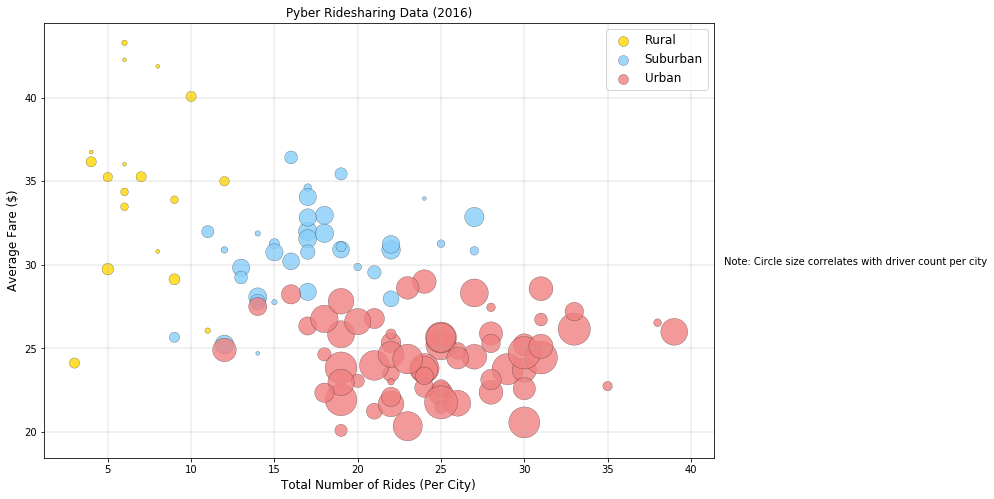

<Figure size 432x288 with 0 Axes>

In [2]:
# Obtain the x and y coordinates for each of the three city types
city_grp = merge_df.groupby('city')

avg_fare = city_grp['fare'].mean()
total_rides = city_grp['city'].count()
city_type = city_grp['type'].first()
driver_ct = city_grp['driver_count'].first()

city_df = pd.DataFrame({'avg fare': avg_fare,
                       'total rides': total_rides,
                       'type': city_type,
                       'driver count': driver_ct})

rural_x = city_df.loc[city_df['type'] == 'Rural', ['total rides']]
rural_y = city_df.loc[city_df['type'] == 'Rural', ['avg fare']]
rural_z = city_df.loc[city_df['type'] == 'Rural', ['driver count']]
suburban_x = city_df.loc[city_df['type'] == 'Suburban', ['total rides']]
suburban_y = city_df.loc[city_df['type'] == 'Suburban', ['avg fare']]
suburban_z = city_df.loc[city_df['type'] == 'Suburban', ['driver count']]
urban_x = city_df.loc[city_df['type'] == 'Urban', ['total rides']]
urban_y = city_df.loc[city_df['type'] == 'Urban', ['avg fare']]
urban_z = city_df.loc[city_df['type'] == 'Urban', ['driver count']]

# Build the scatter plots for each city types
plt.figure(figsize=(12,8))
plt.scatter(rural_x, rural_y, s=rural_z*15, c="gold", alpha=0.8, edgecolors="black", linewidths=0.25, label="Rural")
plt.scatter(suburban_x, suburban_y, s=suburban_z*15, c="lightskyblue", alpha=0.8, edgecolors="black", linewidths=0.25, label="Suburban")
plt.scatter(urban_x, urban_y, s=urban_z*15, c="lightcoral", alpha=0.8, edgecolors="black", linewidths=0.25, label="Urban")

# Incorporate the other graph properties
plt.title("Pyber Ridesharing Data (2016)", fontsize='large')
plt.xlabel("Total Number of Rides (Per City)", fontsize='large')
plt.ylabel("Average Fare ($)", fontsize='large')
plt.grid(alpha=.9, lw=.4)
# Create a legend
lgnd = plt.legend(markerscale=.5, scatterpoints=1, numpoints=1, mode='expanded', fontsize='large')
lgnd.legendHandles[0]._sizes = [100]
lgnd.legendHandles[1]._sizes = [100]
lgnd.legendHandles[2]._sizes = [100]
# Incorporate a text label regarding circle size
plt.annotate('Note: Circle size correlates with driver count per city', xy=(32,28), xytext=(42,30))
plt.show()
# Save Figure
plt.savefig("Pyber Ridesharing Bubbleplot.png")

In [3]:
city_df.head()

,avg fare,total rides,type,driver count
city,,,,
Amandaburgh,24.641667,18,Urban,12
Barajasview,25.332273,22,Urban,26
Barronchester,36.422500,16,Suburban,11
Bethanyland,32.956111,18,Suburban,22
Bradshawfurt,40.064000,10,Rural,7


## Total Fares by City Type

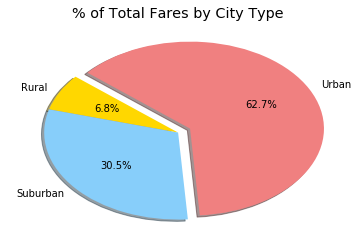

In [4]:
# Calculate Type Percents
type_grp = merge_df.groupby('type').agg({'fare': 'sum',
                                         'ride_id': 'count',})

total_fare = ((type_grp['fare']/type_grp['fare'].sum()) * 100).round(2)
# Build Pie Chart
labels = ['Rural', 'Suburban', 'Urban']
colors = ['gold', 'lightskyblue', 'lightcoral']
explode = (0, 0, 0.1)
plt.pie(total_fare, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Fares by City Type", fontsize='x-large')
# Save Figure
plt.savefig("Pyber Percent of Total Fares by City Type.png")
plt.show()

## Total Rides by City Type

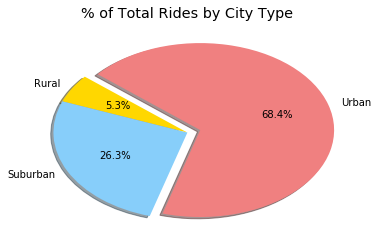

In [5]:
# Calculate Ride Percents
total_rides = (type_grp['ride_id'])
# Build Pie Chart
labels = ['Rural', 'Suburban', 'Urban']
colors = ['gold', 'lightskyblue', 'lightcoral']
explode = (0, 0, 0.1)
plt.pie(total_rides, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Rides by City Type", fontsize='x-large')
# Save Figure
plt.savefig("Pyber Percent of Total Rides by City Type.png")
plt.show()

## Total Drivers by City Type

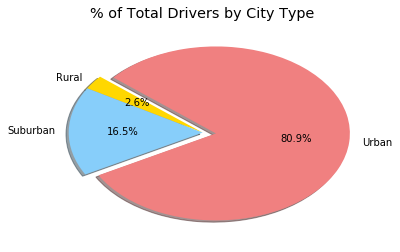

In [6]:
# Calculate Driver Percents
type_grp2 = city_df.groupby('type').agg({'driver count': 'sum'})
total_drivers = (type_grp2['driver count'])
# Build Pie Charts
labels = ['Rural', 'Suburban', 'Urban']
colors = ['gold', 'lightskyblue', 'lightcoral']
explode = (0, 0, 0.1)
plt.pie(total_drivers, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Drivers by City Type", fontsize='x-large')
# Save Figure
plt.savefig("Pyber Percent of Total Drivers by City Type.png")
plt.show()

# Observed Trends

The data shows urban cities garnering the highest percentage of fares (62.7%) and percentage of rides (68.4%). 

Suburban cities have a lower percentage of fares (30.5%) but higher average fare dollar amounts and lower number of drivers per city than urban cities.

Rural cities have the highest average fare dollar amounts, but make up a very small percentage of fares (6.8%).

I believe the suburban market has room for growth and shows a higher profit margin. We could differentiate ourselves from competition perhaps by advertising special rates for carpooling to downtown with designated pickup and dropoff times and locations in areas of high business density.
